In [69]:
import pandas as pd
import numpy as np

In [70]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc , recall_score, precision_score , accuracy_score ,f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df_all = pd.read_csv('df_all.csv', index_col=0)

In [72]:
df_all.head()

,Unnamed: 0,home_team.name,home_team_Shots on Goal,home_team_Shots off Goal,home_team_Total Shots,home_team_Blocked Shots,home_team_Shots insidebox,home_team_Shots outsidebox,home_team_Fouls,home_team_Corner Kicks,...,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK,match_result
0,0,France,4,4,9,1,6,3,21,0,...,0.0,0.333333,4.0,0.0,1.390,0.623333,2.016667,1.390,2.016667,1
1,1,Nigeria,3,5,9,1,4,5,20,3,...,0.0,0.333333,4.0,0.0,1.390,0.623333,2.016667,1.390,2.016667,2
2,2,France,5,8,19,6,12,7,6,4,...,0.5,0.500000,1.5,0.0,1.635,1.230000,2.865000,1.565,2.790000,1
3,3,Brazil,9,7,27,11,16,11,14,8,...,0.5,0.500000,1.5,0.0,1.635,1.230000,2.865000,1.565,2.790000,2
4,4,England,2,6,11,3,6,5,11,7,...,0.5,0.500000,1.5,0.0,1.635,1.230000,2.865000,1.565,2.790000,2


In [73]:
df_all.describe()

,Unnamed: 0,home_team_Shots on Goal,home_team_Shots off Goal,home_team_Total Shots,home_team_Blocked Shots,home_team_Shots insidebox,home_team_Shots outsidebox,home_team_Fouls,home_team_Corner Kicks,home_team_Offsides,...,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK,match_result
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,30.000000,4.557377,5.672131,13.639344,3.409836,8.049180,5.672131,13.245902,4.868852,1.426230,...,0.560109,0.740437,4.382514,0.155738,1.071230,0.609372,1.680929,0.941721,1.551995,1.278689
std,17.752934,2.480085,2.669090,5.893592,2.525715,3.621354,3.144950,4.832721,2.623455,1.203592,...,0.503720,0.595916,2.148286,0.241271,0.398725,0.369493,0.737112,0.424881,0.756721,0.710191
min,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,2.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.330000,0.000000,0.330000,0.000000,0.000000,0.000000
25%,15.000000,3.000000,4.000000,9.000000,2.000000,5.000000,3.000000,10.000000,3.000000,1.000000,...,0.000000,0.333333,3.000000,0.000000,0.670000,0.330000,1.113333,0.670000,1.000000,1.000000
50%,30.000000,4.000000,6.000000,12.000000,3.000000,8.000000,5.000000,13.000000,5.000000,1.000000,...,0.500000,0.666667,4.000000,0.000000,1.000000,0.483333,1.476667,0.863333,1.346667,1.000000
75%,45.000000,6.000000,7.000000,18.000000,4.000000,11.000000,7.000000,16.000000,7.000000,2.000000,...,1.000000,1.000000,5.500000,0.333333,1.390000,0.793333,2.016667,1.330000,2.016667,2.000000
max,60.000000,12.000000,12.000000,27.000000,11.000000,16.000000,15.000000,25.000000,10.000000,5.000000,...,2.000000,2.000000,11.000000,0.666667,1.890000,1.575000,3.470000,1.690000,3.270000,2.000000


In [74]:
X = df_all.drop('match_result',axis=1)
y = df_all['match_result']

In [75]:
#building the pipeline
categorical_cols = [col for col in X.columns if (X[col].dtype == 'object') ]
#categorical_cols  = ['Sponsor/Outfitter: i.e. boot']
numerical_cols = [col for col in X.columns if (X[col].dtype != 'object') ]


class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names]
    

#Use one hot encoder for categorical variables
cat_pipeline = Pipeline([
    ('select_cat', DataFrameSelector(categorical_cols)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

num_pipeline = Pipeline([
    ('select_numeric', DataFrameSelector(numerical_cols))
#    ('scaler', StandardScaler())
])

#add the numerical and categorical variables together
preprocess_pipeline = FeatureUnion(transformer_list=[
    ('numeric_pipeline',num_pipeline),
    ('cat_pipeline' , cat_pipeline)
])

In [76]:
[col for col in X.columns if (X[col].dtype == 'object') ]

['home_team.name', 'away_team.name']

In [77]:
X = preprocess_pipeline.fit_transform(X)

In [78]:
X

array([[ 0.,  4.,  4., ...,  0.,  0.,  0.],
       [ 1.,  3.,  5., ...,  0.,  0.,  0.],
       [ 2.,  5.,  8., ...,  0.,  0.,  0.],
       ...,
       [58.,  2.,  2., ...,  0.,  0.,  0.],
       [59.,  3.,  4., ...,  0.,  0.,  0.],
       [60.,  3.,  4., ...,  0.,  0.,  0.]])

In [79]:
from sklearn.linear_model import LogisticRegression

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

model = LogisticRegression()
model.fit(X_train_val , y_train_val)

LogisticRegression()

In [80]:
predictions =model.predict_proba(X_test)

In [81]:
preds = model.predict(X_test)

In [82]:
np.round(predictions,2)

array([[0.11, 0.55, 0.34],
       [0.14, 0.61, 0.25],
       [0.26, 0.45, 0.29],
       [0.14, 0.21, 0.66],
       [0.29, 0.42, 0.29],
       [0.24, 0.28, 0.47],
       [0.13, 0.2 , 0.66]])

In [83]:
model.classes_

array([0, 1, 2])

In [84]:
results_df = pd.DataFrame(columns=model.classes_,data=np.round(predictions,2))
results_df.rename(columns={0:'Draw Probability',1:'Home team wins Probability',2:'Home team Loses Probability'},inplace=True)
results_df

,Draw Probability,Home team wins Probability,Home team Loses Probability
0,0.11,0.55,0.34
1,0.14,0.61,0.25
2,0.26,0.45,0.29
3,0.14,0.21,0.66
4,0.29,0.42,0.29
5,0.24,0.28,0.47
6,0.13,0.20,0.66


In [85]:
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(y_test,preds)

NameError: name 'sklearn' is not defined

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         4
           2       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.56      0.67      0.60         7
weighted avg       0.76      0.86      0.80         7



/Users/zz/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zz/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zz/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


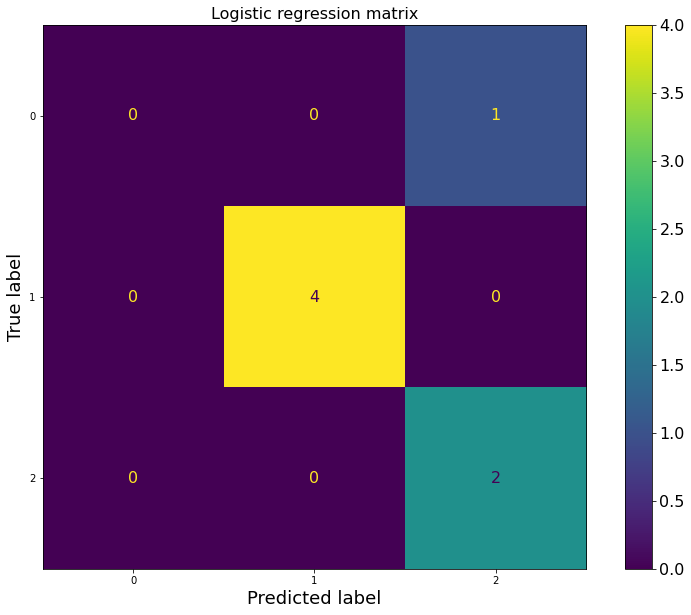

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(14, 10))
# Create the matrix
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test, preds)
cmp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
ax.set_title('Logistic regression matrix',fontsize=16)
ax.set_xlabel('Predicted Label',fontsize=18)
ax.set_ylabel('True Label',fontsize=18)
#ax.tick_params(axis='both', which='major', labelsize=15) 
cmp.plot(ax=ax)

plt.show();

## Trying XGboost classifier

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X_train_val , y_train_val)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
preds_a = xgb_cl.predict_proba(X_test)

preds_a

NameError: name 'xgb_cl' is not defined

In [ ]:
preds2 = xgb_cl.predict(X_test)
metrics.accuracy_score(y_test,preds2)

0.8571428571428571

In [ ]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         4
           2       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.56      0.67      0.60         7
weighted avg       0.76      0.86      0.80         7



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Mapping team names to values

In [ ]:

def assign_values_to_team1(team):
    
    if team in df_2.index :
        team1_data =  df_2.loc[team].reset_index()
        team1_data = team1_data.groupby('index').mean().reset_index().rename(columns={'index':'home_team.name'}).iloc[0]
        return team1_data

#     else:
#         return(pd.concat([pd.Series(data = [team], index=['home_team.name']),average_home]))
    
def assign_values_to_team2(team):
    
    if team in df_3.index :
        team2_data =  df_3.loc[team].reset_index()
        team2_data = team2_data.groupby('index').mean().reset_index().rename(columns={'index':'away_team.name'}).iloc[0]
        return team2_data

#     else:
#         return(pd.concat([pd.Series(data = [team], index=['away_team.name']),average_away]))
        
    
def map_inputs_to_data(team1,team2):
    team_1 = assign_values_to_team1(team1)
    team_2 = assign_values_to_team2(team2)

    input_data = pd.concat([team_1,team_2])
    return input_data

In [68]:
len(df_team_away.reset_index().groupby('index').mean().index)

NameError: name 'df_team_away' is not defined

## Try with different inputs

### Teams played in world cup 2018

In [86]:
pd.DataFrame(input_d).T

NameError: name 'input_d' is not defined

In [87]:
input_d = map_inputs_to_data('Egypt' , 'England')
input_processed = preprocess_pipeline.transform(pd.DataFrame(input_d).T)

NameError: name 'df_2' is not defined

In [ ]:
preds_test = model.predict_proba(input_processed)

In [88]:
np.round(preds_test,2)

NameError: name 'preds_test' is not defined

In [89]:
classes = model.classes_

In [90]:
classes

array([0, 1, 2])

In [91]:
def predict_match_result(team1 ,team2):
    
    input_d = map_inputs_to_data(team1 , team2)
    input_processed = preprocess_pipeline.transform(pd.DataFrame(input_d).T)
    preds_test = model.predict_proba(input_processed)
    
    results_df = pd.DataFrame(columns=classes,data=np.round(preds_test,2))
    results_df.rename(columns={0:'Draw Probability',1:'{} wins Probability'.format(team1),2:'{} wins Probability'.format(team2)},inplace=True)
    return(results_df)
    
                     

In [92]:
df_3

NameError: name 'df_3' is not defined

In [94]:
# pickling the model
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [95]:
pickle_out2 = open("pipeline.pkl", "wb")
pickle.dump(preprocess_pipeline, pickle_out2)
pickle_out2.close()

### New Teams

In [ ]:
# def predict_new_team_match_result(team1 ,team2):
    
    
    
#     input_d = map_inputs_to_data(team1 , team2)
#     df_temp = df_all.append(input_d, ignore_index=True)
#     X = df_temp.drop('match_result',axis=1)
#     y = df_temp['match_result']
    
#     X = preprocess_pipeline.fit_transform(X)
#     preds_test =model.predict_proba(X[-1].reshape(1, -1))
#     results_df = pd.DataFrame(columns=classes,data=np.round(preds_test,2))
#     results_df.rename(columns={0:'Draw Probability',1:'{} wins Probability'.format(team1),2:'{} wins Probability'.format(team2)},inplace=True)
#     display(results_df)

# predict_new_team_match_result('Libya' , 'England')